In [1]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks)
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
image = np.zeros((100, 100))
idx = np.arange(25, 75)
idy = np.ones(50,dtype=int)
idy = idy * 25
image[idx[::-1], idx] = 255
image[idx, idy] = 255
image[idy, idx] = 255

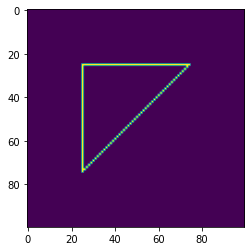

In [4]:
plt.imshow(image)

In [6]:
hough_line(image)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint64),
 array([-1.57079633, -1.55324553, -1.53569473, -1.51814394, -1.50059314,
        -1.48304234, -1.46549155, -1.44794075, -1.43038995, -1.41283915,
        -1.39528836, -1.37773756, -1.36018676, -1.34263597, -1.32508517,
        -1.30753437, -1.28998358, -1.27243278, -1.25488198, -1.23733118,
        -1.21978039, -1.20222959, -1.18467879, -1.167128  , -1.1495772 ,
        -1.1320264 , -1.11447561, -1.09692481, -1.07937401, -1.06182322,
        -1.04427242, -1.02672162, -1.00917082, -0.99162003, -0.97406923,
        -0.95651843, -0.93896764, -0.92141684, -0.90386604, -0.88631525,
        -0.86876445, -0.85121365, -0.83366286, -0.81611206, -0.79856126,
        -0.78101046, -0.76345967, -0.74590887, -0.72835807, -0.71080728,
        -0.69325648, -0.67570568, -0.658154

In [5]:
h, theta, d = hough_line(image)

In [8]:
hough_line_peaks(h, theta, d)

(array([51, 50, 33], dtype=uint64),
 array([0.79856126, 1.57079633, 0.0087754 ]),
 array([70.74911661, 25.59010601, 25.59010601]))

In [17]:
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    print(_, angle, dist)

51 0.79856126110802 70.74911660777386
50 1.5707963267948966 25.590106007067135
33 0.008775398473714446 25.590106007067135


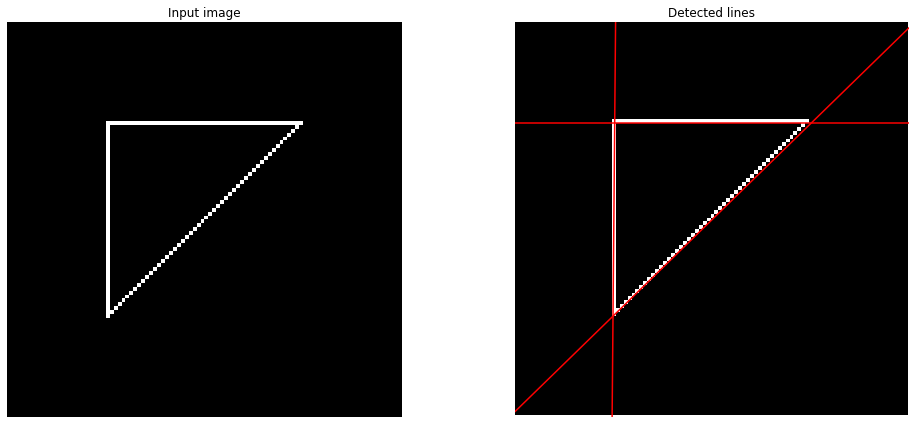

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()
ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()
ax[1].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')
plt.tight_layout()
plt.show()